# Set indir and load libraries

In [1]:
indir='../../../output/run_20230920_0000_EXP0_reference'

## Load libraries

In [2]:
from gudinfo import RunInfo
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
import numpy as np
import os.path

plt.close("all")

# Photosynthesis parameters

## Size (ESD, $\mu m$)

In [3]:
info = RunInfo(indir)
esd=info.f['esd']

## Biovolume (V, $(\mu m)^3$)

In [4]:
vol=info.f['vol']

## Nutrient uptake for half saturation ($K_{NO_3}$, $mmol N m^{-3}$)

$K_{NO_3}=a_{K_{NO_3}}V^{b_{K_{NO_3}}}$

In [5]:
nplk=info.nplk
K=np.empty(nplk)
K[:]=np.nan
a_kn_no3=info.params['a_kn_no3'] # in mmol N m^3
vol=info.f['vol'] # in um^3
b_kn_no3=info.params['b_kn_no3'] # unitless
for iplk in range(0,nplk):
    grp=info.f['grp'][iplk]
    if (0<=grp and grp<8):
        K[iplk]=a_kn_no3[grp]*vol[iplk]**b_kn_no3[grp]

## Maximum growth rate ($\mu_{max}$, $d^{-1}$)

$\mu_{max}(igroup)=a_{V_{{max}_{DIC}}}(igroup)V^{b_{V_{{max}_{DIC}}}(igroup)}$

In [6]:
nplk=info.nplk
mu_max_d=np.empty(nplk)
mu_max_d[:]=np.nan
a_vmax_dic_s=info.params['a_vmax_dic'] # in s^-1
a_vmax_dic_d=a_vmax_dic_s*info.params['a_vmax_dic_denom'] # in d^-1
vol=info.f['vol'] # in um^3
b_vmax_dic=info.params['b_vmax_dic'] # unitless
for iplk in range(0,nplk):
    grp=info.f['grp'][iplk]
    if (0<=grp and grp<8):
        mu_max_d[iplk]=a_vmax_dic_d[grp]*vol[iplk]**b_vmax_dic[grp]

## Minimum cell quota of nitrogen relative to carbon ($Q^{min}_N$, $mmol\ N\ (mmol\ C)^{-1}$)

$Q^{min}_{N}=a_{Q^{min}_{N}}V^{b_{Q^{min}_{N}}}$

In [7]:
nplk=info.nplk
Q_min=np.empty(nplk)
Q_min[:]=np.nan
a_qmin_n=info.params['a_qmin_n'] # in mmol N (mmol C)^-1
vol=info.f['vol'] # in um^3
b_qmin_n=info.params['b_qmin_n'] # unitless
for iplk in range(0,nplk):
    grp=info.f['grp'][iplk]
    if (0<=grp and grp<8):
        Q_min[iplk]=a_qmin_n[grp]*vol[iplk]**b_qmin_n[grp]

## Maximum nutrient uptake rate of nitrate relative to carbon ($V^{max}_{NO_3}$, $mmol\ N\ (mmol\ C)^{-1}\ d^{-1}$)

$V^{max}_{NO_3}=a_{V^{max}_{NO_3}}V^{b_{V^{max}_{NO_3}}}$

In [8]:
nplk=info.nplk
V_max_d=np.empty(nplk)
V_max_d[:]=np.nan
a_vmax_no3_s=info.params['a_vmax_no3'] # in mmol N (mmol C)^-1 s^-1
a_vmax_no3_d=a_vmax_no3_s*86400        # in mmol N (mmol C)^-1 d^-1
vol=info.f['vol'] # in um^3
b_vmax_no3=info.params['b_vmax_no3'] # unitless
for iplk in range(0,nplk):
    grp=info.f['grp'][iplk]
    if (0<=grp and grp<8):
        V_max_d[iplk]=a_vmax_no3_d[grp]*vol[iplk]**b_vmax_no3[grp]

## Half saturation for growth on $NO_3$ ($k_{NO_3}$, $mmol\ N\ m^{-3}$)

$k_{NO_3}=K_{NO_3}\frac{\mu_{max}Q^{min}_{N}}{V^{max}_{NO_3}}$

In [9]:
nplk=info.nplk
ksatno3_mbg=np.empty(nplk)
ksatno3_mbg[:]=np.nan
for iplk in range(0,nplk):
    grp=info.f['grp'][iplk]
    if (0<=grp and grp<8):
        ksatno3_mbg[iplk]=K[iplk]*mu_max_d[iplk]*Q_min[iplk]/V_max_d[iplk]

$k_{NO_3}$ read from RunInfo class (O. Jahn).

In [10]:
ksatno3_runinfo=info.f['ksatno3']

## Affinity for $NO_3$ ($affinity_{NO_3}$, $(mmol\ N/m^3)^{-1}\ d^{-1}$)

$affinity_{NO_3}=\frac{\mu_{{max}_{NO_3}}}{k_{NO_3}}$

$k_{NO_3}$ from RunInfo will be used.

In [11]:
nplk=info.nplk
affinityno3=np.empty(nplk)
affinityno3[:]=np.nan
for iplk in range(0,nplk):
    grp=info.f['grp'][iplk]
    if (0<=grp and grp<8):
        affinityno3[iplk]=mu_max_d[iplk]/ksatno3_runinfo[iplk]

## Plots

In [12]:
# adapted from
# https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
# answer of Pedro M Duarte
VERY_SMALL_SIZE=12
SMALL_SIZE = 25
MEDIUM_SIZE = 30
BIGGER_SIZE = 56

# plt.rc('font', size=MEDIUM_SIZE)       # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('lines', markersize=VERY_SMALL_SIZE) # fontsize of the markers
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the x tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the y tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

In [13]:
type_id=np.arange(1,52)

pos_Prochlorococcus=np.arange( 0, 1)
pos_Synechococcus  =np.arange( 1, 2)
pos_smalleuk       =np.arange( 2, 4)
pos_cocco          =np.arange( 4, 9)
pos_diazo          =np.arange( 9,13)
pos_Trichodesmium  =np.arange(13,14)
pos_diatoms        =np.arange(14,23)
pos_mixodino       =np.arange(23,33)
pos_zoo            =np.arange(33,49)

In [14]:
# fig,ax=plt.subplots(figsize=(16, 6))
# h1=ax.plot(type_id[pos_Prochlorococcus],esd[pos_Prochlorococcus],'gs', markersize=12)
# h2=ax.plot(type_id[pos_Synechococcus],  esd[pos_Synechococcus],  'gp')
# h3=ax.plot(type_id[pos_smalleuk],       esd[pos_smalleuk],       'gh')
# h4=ax.plot(type_id[pos_cocco],          esd[pos_cocco],          'b+')
# h5=ax.plot(type_id[pos_diazo],          esd[pos_diazo],          'cx')
# h6=ax.plot(type_id[pos_Trichodesmium],  esd[pos_Trichodesmium],  'cX')
# h7=ax.plot(type_id[pos_diatoms],        esd[pos_diatoms],        'ro')
# h8=ax.plot(type_id[pos_mixodino],       esd[pos_mixodino],       'md')
# h9=ax.plot(type_id[pos_zoo],            esd[pos_zoo],            'k*')


# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_minor_locator(MultipleLocator( 1))
# ax.set_yscale('log')
# ax.grid()
# ax.set_xlim([0,70])
# ax.set_title('Size')
# ax.set_xlabel('Planktonic type ID')
# ax.set_ylabel('Size (ESD,$\mu$m)')
# ax.legend([h1[0],h2[0],h3[0],h4[0],h5[0],h6[0],h7[0],h8[0],h9[0]],
#            ['$Procholorococcus$',
#             '$Synechococcus$',
#             'small eukaryotes',
#             'other eukaryotes',
#             'diazotrophs',
#             '$Trichodesmium$',
#             'diatoms',
#             'mixo dino',
#             'microzooplankton'
#            ],
#           loc=4,
#           fontsize='xx-large'
#          )

# plt.tight_layout()
# figfile=os.path.join(indir,'gud_traits.esd.prok.png')
# plt.savefig(figfile)

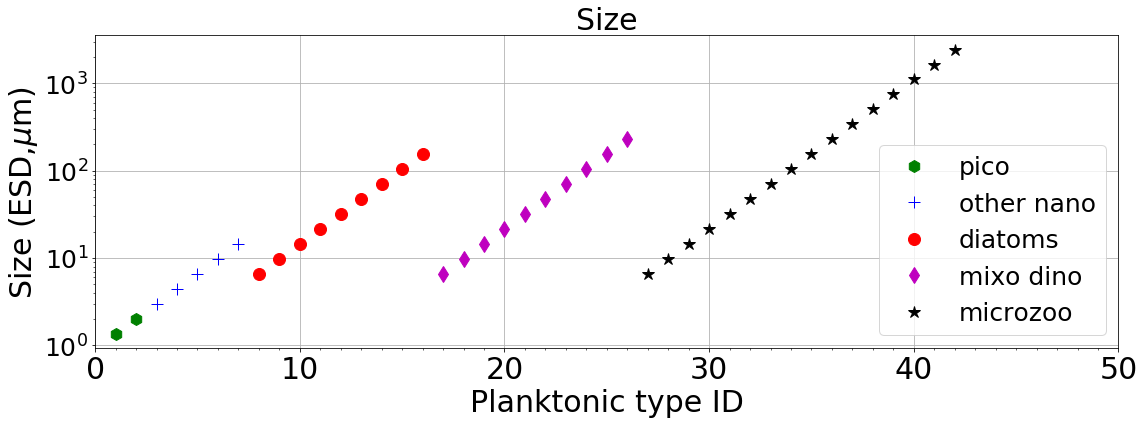

In [15]:
fig,ax=plt.subplots(figsize=(16, 6))
h3=ax.plot(type_id[pos_smalleuk]-2,  esd[pos_smalleuk],'gh',markersize=12)
h4=ax.plot(type_id[pos_cocco]-2,     esd[pos_cocco],   'b+')
h7=ax.plot(type_id[pos_diatoms]-2-5, esd[pos_diatoms], 'ro')
h8=ax.plot(type_id[pos_mixodino]-2-5,esd[pos_mixodino],'md')
h9=ax.plot(type_id[pos_zoo]-2-5,     esd[pos_zoo],     'k*')


ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator( 1))
ax.set_yscale('log')
ax.grid()
ax.set_xlim([0,50])
ax.set_title('Size')
ax.set_xlabel('Planktonic type ID')
ax.set_ylabel('Size (ESD,$\mu$m)')
ax.legend([h3[0],h4[0],h7[0],h8[0],h9[0]],
            ['pico',
            'other nano',
            'diatoms',
            'mixo dino',
            'microzoo'
            ],
          loc=4,
          fontsize=25
         )

plt.tight_layout()
figfile=os.path.join(indir,'gud_traits.esd.png')
plt.savefig(figfile)

In [16]:
# fig,ax=plt.subplots(figsize=(16, 6))
# h1=ax.plot(type_id[pos_Prochlorococcus],vol[pos_Prochlorococcus],'gs', markersize=12)
# h2=ax.plot(type_id[pos_Synechococcus],  vol[pos_Synechococcus],  'gp')
# h3=ax.plot(type_id[pos_smalleuk],       vol[pos_smalleuk],       'gh')
# h4=ax.plot(type_id[pos_cocco],          vol[pos_cocco],          'b+')
# h5=ax.plot(type_id[pos_diazo],          vol[pos_diazo],          'cx')
# h6=ax.plot(type_id[pos_Trichodesmium],  vol[pos_Trichodesmium],  'cX')
# h7=ax.plot(type_id[pos_diatoms],        vol[pos_diatoms],        'ro')
# h8=ax.plot(type_id[pos_mixodino],       vol[pos_mixodino],       'md')
# h9=ax.plot(type_id[pos_zoo],            vol[pos_zoo],            'k*')


# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_minor_locator(MultipleLocator( 1))
# ax.set_yscale('log')
# ax.grid()
# ax.set_xlim([0,70])
# ax.set_title('Biovolume')
# ax.set_xlabel('Planktonic type ID')
# ax.set_ylabel('Biovolume ($\mu m^3$)')
# ax.legend([h1[0],h2[0],h3[0],h4[0],h5[0],h6[0],h7[0],h8[0],h9[0]],
#            ['$Procholorococcus$',
#             '$Synechococcus$',
#             'small eukaryotes',
#             'other eukaryotes',
#             'diazotrophs',
#             '$Trichodesmium$',
#             'diatoms',
#             'mixo dino',
#             'microzooplankton'
#            ],
#           loc=4,
#           fontsize='xx-large'
#          )

# plt.tight_layout()
# figfile=os.path.join(indir,'gud_traits.vol.prok.png')
# plt.savefig(figfile)

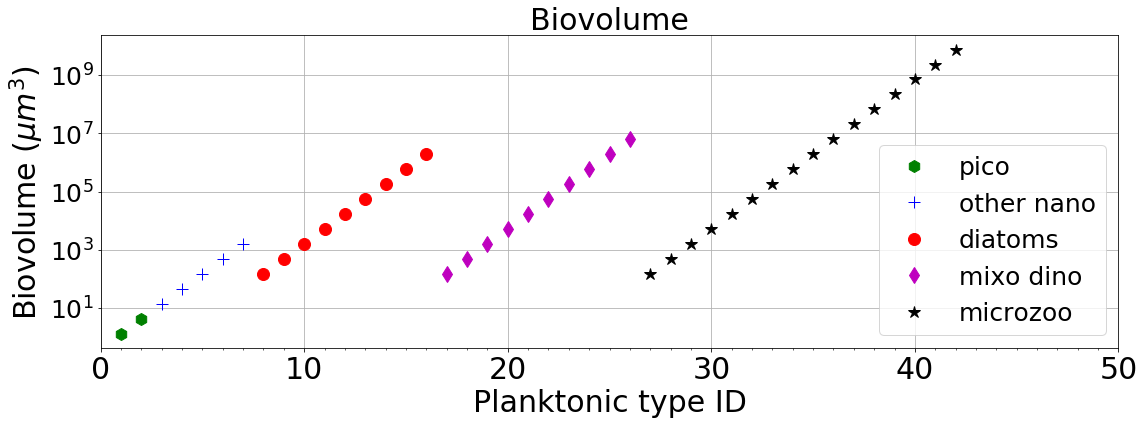

In [17]:
fig,ax=plt.subplots(figsize=(16, 6))
h3=ax.plot(type_id[pos_smalleuk]-2,  vol[pos_smalleuk],'gh',markersize=12)
h4=ax.plot(type_id[pos_cocco]-2,     vol[pos_cocco],   'b+')
h7=ax.plot(type_id[pos_diatoms]-2-5, vol[pos_diatoms], 'ro')
h8=ax.plot(type_id[pos_mixodino]-2-5,vol[pos_mixodino],'md')
h9=ax.plot(type_id[pos_zoo]-2-5,     vol[pos_zoo],     'k*')


ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator( 1))
ax.set_yscale('log')
ax.grid()
ax.set_xlim([0,50])
ax.set_title('Biovolume')
ax.set_xlabel('Planktonic type ID')
ax.set_ylabel('Biovolume ($\mu m^3$)')
ax.legend([h3[0],h4[0],h7[0],h8[0],h9[0]],
            ['pico',
            'other nano',
            'diatoms',
            'mixo dino',
            'microzoo'
            ],
          loc=4,
          fontsize=25
         )

plt.tight_layout()
figfile=os.path.join(indir,'gud_traits.vol.png')
plt.savefig(figfile)

In [18]:
# fig,ax=plt.subplots(figsize=(16, 6))
# h1=ax.plot(type_id[pos_Prochlorococcus],K[pos_Prochlorococcus],'gs', markersize=12)
# h2=ax.plot(type_id[pos_Synechococcus],  K[pos_Synechococcus],  'gp')
# h3=ax.plot(type_id[pos_smalleuk],       K[pos_smalleuk],       'gh')
# h4=ax.plot(type_id[pos_cocco],          K[pos_cocco],          'b+')
# h5=ax.plot(type_id[pos_diazo],          K[pos_diazo],          'cx')
# h6=ax.plot(type_id[pos_Trichodesmium],  K[pos_Trichodesmium],  'cX')
# h7=ax.plot(type_id[pos_diatoms],        K[pos_diatoms],        'ro')
# h8=ax.plot(type_id[pos_mixodino],       K[pos_mixodino],       'md')
# h9=ax.plot(type_id[pos_zoo],            K[pos_zoo],            'k*')

# ax.set_yscale('log')
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_minor_locator(MultipleLocator( 1))
# ax.grid()
# ax.set_xlim([0,70])
# ax.set_title('Nutrient uptake half saturation for $NO_3$')
# ax.set_xlabel('Planktonic type ID')
# ax.set_ylabel('$K\ (mmol\ N\ m^{-3})$')
# ax.legend([h1[0],h2[0],h3[0],h4[0],h5[0],h6[0],h7[0],h8[0],h9[0]],
#            ['$Procholorococcus$',
#             '$Synechococcus$',
#             'small eukaryotes',
#             'other eukaryotes',
#             'diazotrophs',
#             '$Trichodesmium$',
#             'diatoms',
#             'mixo dino',
#             'microzooplankton'
#            ],
#           loc=4,
#           fontsize='xx-large'
#          )

# plt.tight_layout()
# figfile=os.path.join(indir,'gud_traits.K.prok.png')
# plt.savefig(figfile)

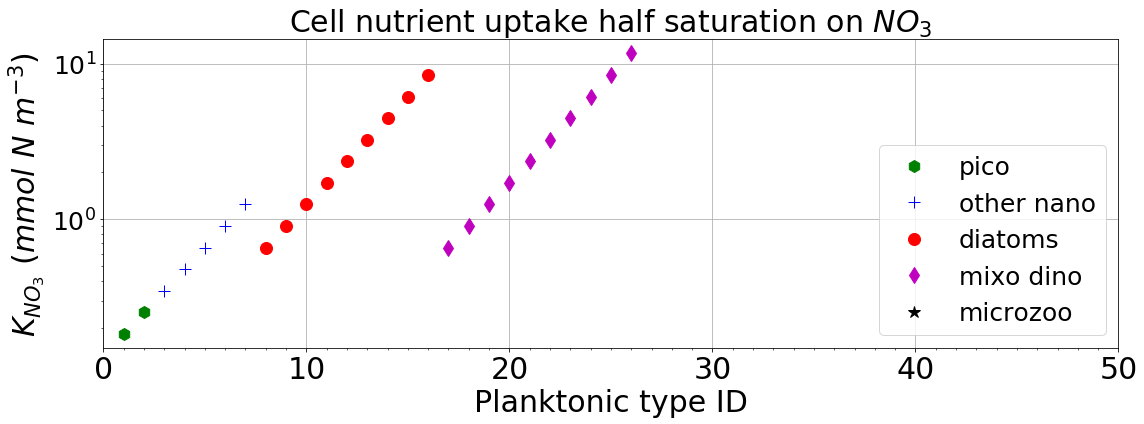

In [19]:
fig,ax=plt.subplots(figsize=(16, 6))
h3=ax.plot(type_id[pos_smalleuk]-2,  K[pos_smalleuk],'gh',markersize=12)
h4=ax.plot(type_id[pos_cocco]-2,     K[pos_cocco],   'b+')
h7=ax.plot(type_id[pos_diatoms]-2-5, K[pos_diatoms], 'ro')
h8=ax.plot(type_id[pos_mixodino]-2-5,K[pos_mixodino],'md')
h9=ax.plot(type_id[pos_zoo]-2-5,     K[pos_zoo],     'k*')


ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator( 1))
ax.set_yscale('log')
ax.grid()
ax.set_xlim([0,50])
ax.set_title('Cell nutrient uptake half saturation on $NO_3$')
ax.set_xlabel('Planktonic type ID')
ax.set_ylabel('$K_{NO_3}\ (mmol\ N\ m^{-3})$')
ax.legend([h3[0],h4[0],h7[0],h8[0],h9[0]],
            ['pico',
            'other nano',
            'diatoms',
            'mixo dino',
            'microzoo'
            ],
          loc=4,
          fontsize=25
         )

plt.tight_layout()
figfile=os.path.join(indir,'gud_traits.K.png')
plt.savefig(figfile)

In [20]:
# fig,ax=plt.subplots(figsize=(16, 6))
# h1=ax.plot(type_id[pos_Prochlorococcus],mu_max_d[pos_Prochlorococcus],'gs', markersize=12)
# h2=ax.plot(type_id[pos_Synechococcus],  mu_max_d[pos_Synechococcus],  'gp')
# h3=ax.plot(type_id[pos_smalleuk],       mu_max_d[pos_smalleuk],       'gh')
# h4=ax.plot(type_id[pos_cocco],          mu_max_d[pos_cocco],          'b+')
# h5=ax.plot(type_id[pos_diazo],          mu_max_d[pos_diazo],          'cx')
# h6=ax.plot(type_id[pos_Trichodesmium],  mu_max_d[pos_Trichodesmium],  'cX')
# h7=ax.plot(type_id[pos_diatoms],        mu_max_d[pos_diatoms],        'ro')
# h8=ax.plot(type_id[pos_mixodino],       mu_max_d[pos_mixodino],       'md')
# h9=ax.plot(type_id[pos_zoo],            mu_max_d[pos_zoo],            'k*')

# ax.set_yscale('log')
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_minor_locator(MultipleLocator( 1))
# ax.grid()
# ax.set_xlim([0,70])
# ax.set_ylim([0.4,4])
# ax.set_title('Maximum growth rate')
# ax.set_xlabel('Planktonic type ID')
# ax.set_ylabel('$P^C_{max} (d^{-1}$)')
# ax.legend([h1[0],h2[0],h3[0],h4[0],h5[0],h6[0],h7[0],h8[0],h9[0]],
#            ['$Procholorococcus$',
#             '$Synechococcus$',
#             'small eukaryotes',
#             'other eukaryotes',
#             'diazotrophs',
#             '$Trichodesmium$',
#             'diatoms',
#             'mixo dino',
#             'microzooplankton'
#            ],
#           loc=4,
#           fontsize='xx-large'
#          )

# plt.tight_layout()
# figfile=os.path.join(indir,'gud_traits.PC_max.prok.png')
# plt.savefig(figfile)

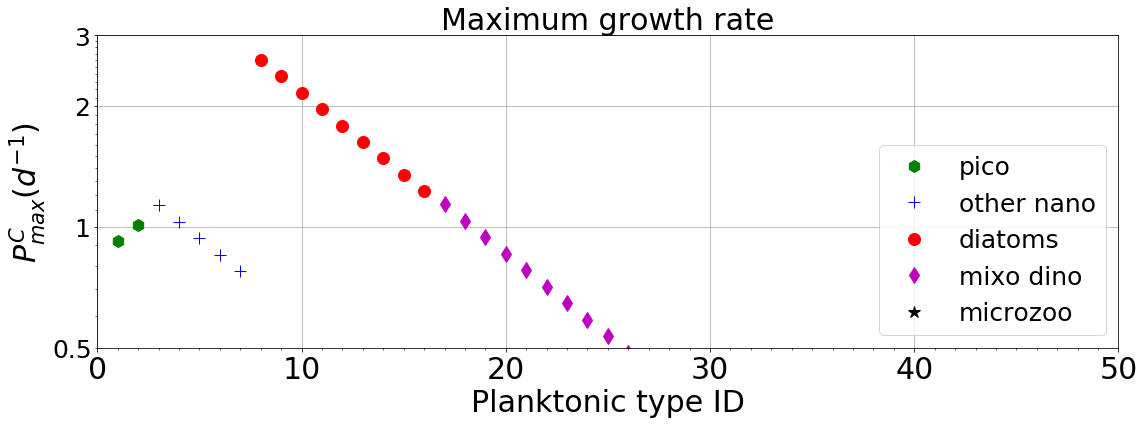

In [21]:
fig,ax=plt.subplots(figsize=(16, 6))
h3=ax.plot(type_id[pos_smalleuk]-2,  mu_max_d[pos_smalleuk],'gh',markersize=12)
h4=ax.plot(type_id[pos_cocco]-2,     mu_max_d[pos_cocco],   'b+')
h7=ax.plot(type_id[pos_diatoms]-2-5, mu_max_d[pos_diatoms], 'ro')
h8=ax.plot(type_id[pos_mixodino]-2-5,mu_max_d[pos_mixodino],'md')
h9=ax.plot(type_id[pos_zoo]-2-5,     mu_max_d[pos_zoo],     'k*')

ax.set_yscale('log')
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.grid()
ax.set_xlim([0,50])
ax.set_ylim([0.5,3])
ax.yaxis.set_major_locator(plt.FixedLocator([1,2,3]))
ax.yaxis.set_minor_locator(plt.FixedLocator(np.arange(0.5,3.1,0.1)))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%0.f'))
ax.yaxis.set_minor_formatter(plt.FixedFormatter(['0.5']))
ax.set_title('Maximum growth rate')
ax.set_xlabel('Planktonic type ID')
ax.set_ylabel('$P^C_{max} (d^{-1}$)')
ax.legend([h3[0],h4[0],h7[0],h8[0],h9[0]],
            ['pico',
            'other nano',
            'diatoms',
            'mixo dino',
            'microzoo'
            ],
          loc=4,
          fontsize=25
         )

plt.tight_layout()
figfile=os.path.join(indir,'gud_traits.PC_max.png')
plt.savefig(figfile)

In [22]:
# fig,ax=plt.subplots(figsize=(16, 6))
# h1=ax.plot(type_id[pos_Prochlorococcus],Q_min[pos_Prochlorococcus],'gs', markersize=12)
# h2=ax.plot(type_id[pos_Synechococcus],  Q_min[pos_Synechococcus],  'gp')
# h3=ax.plot(type_id[pos_smalleuk],       Q_min[pos_smalleuk],       'gh')
# h4=ax.plot(type_id[pos_cocco],          Q_min[pos_cocco],          'b+')
# h5=ax.plot(type_id[pos_diazo],          Q_min[pos_diazo],          'cx')
# h6=ax.plot(type_id[pos_Trichodesmium],  Q_min[pos_Trichodesmium],  'cX')
# h7=ax.plot(type_id[pos_diatoms],        Q_min[pos_diatoms],        'ro')
# h8=ax.plot(type_id[pos_mixodino],       Q_min[pos_mixodino],       'md')
# h9=ax.plot(type_id[pos_zoo],            Q_min[pos_zoo],            'k*')

# ax.set_yscale('log')
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_minor_locator(MultipleLocator( 1))
# ax.grid()
# ax.set_xlim([0,70])
# ax.set_title('Minimum cell quota for $NO_3$\nrelative to carbon')
# ax.set_xlabel('Planktonic type ID')
# ax.set_ylabel('$Q_{min}\ (mmol\ N\ (mmol\ C)^{-1})$')
# # ax.yaxis.set_label_coords(-0.06,0.6)
# ax.yaxis.label.set_size(SMALL_SIZE)
# ax.legend([h1[0],h2[0],h3[0],h4[0],h5[0],h6[0],h7[0],h8[0],h9[0]],
#            ['$Procholorococcus$',
#             '$Synechococcus$',
#             'small eukaryotes',
#             'other eukaryotes',
#             'diazotrophs',
#             '$Trichodesmium$',
#             'diatoms',
#             'mixo dino',
#             'microzooplankton'
#            ],
#           loc=4,
#           fontsize='xx-large'
#          )

# plt.tight_layout()
# figfile=os.path.join(indir,'gud_traits.Q_min.prok.png')
# plt.savefig(figfile)

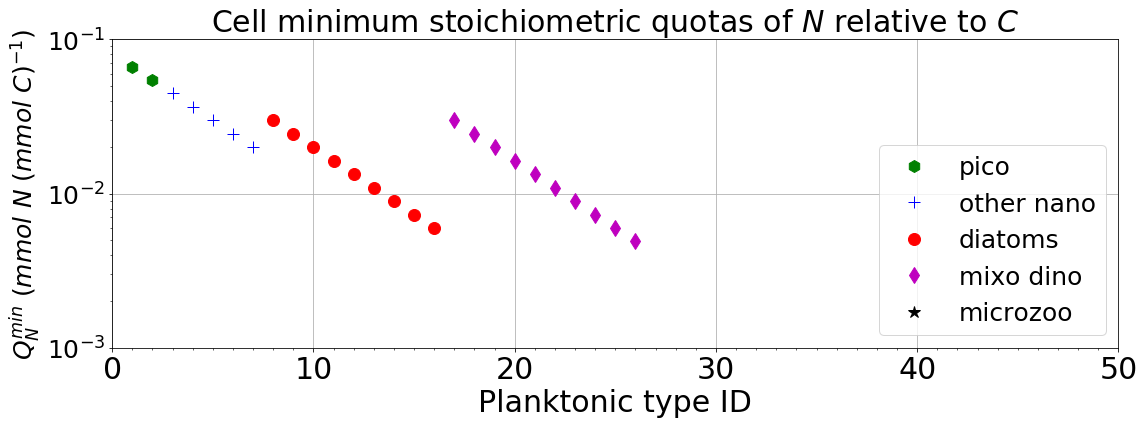

In [23]:
fig,ax=plt.subplots(figsize=(16, 6))
h3=ax.plot(type_id[pos_smalleuk]-2,  Q_min[pos_smalleuk],'gh',markersize=12)
h4=ax.plot(type_id[pos_cocco]-2,     Q_min[pos_cocco],   'b+')
h7=ax.plot(type_id[pos_diatoms]-2-5, Q_min[pos_diatoms], 'ro')
h8=ax.plot(type_id[pos_mixodino]-2-5,Q_min[pos_mixodino],'md')
h9=ax.plot(type_id[pos_zoo]-2-5,     Q_min[pos_zoo],     'k*')

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator( 1))
ax.set_yscale('log')
ax.grid()
ax.set_xlim([0,50])
ax.set_ylim([0.001,0.1])
ax.set_title('Cell minimum stoichiometric quotas of $N$ relative to $C$')
ax.set_xlabel('Planktonic type ID')
ax.set_ylabel('$Q^{min}_N\ (mmol\ N\ (mmol\ C)^{-1})$')
ax.yaxis.label.set_size(SMALL_SIZE)
ax.legend([h3[0],h4[0],h7[0],h8[0],h9[0]],
            ['pico',
            'other nano',
            'diatoms',
            'mixo dino',
            'microzoo'
            ],
          loc=4,
          fontsize=25)

plt.tight_layout()
figfile=os.path.join(indir,'gud_traits.Q_min.png')
plt.savefig(figfile)

In [24]:
# fig,ax=plt.subplots(figsize=(16, 6))
# h1=ax.plot(type_id[pos_Prochlorococcus],V_max_d[pos_Prochlorococcus],'gs', markersize=12)
# h2=ax.plot(type_id[pos_Synechococcus],  V_max_d[pos_Synechococcus],  'gp')
# h3=ax.plot(type_id[pos_smalleuk],       V_max_d[pos_smalleuk],       'gh')
# h4=ax.plot(type_id[pos_cocco],          V_max_d[pos_cocco],          'b+')
# h5=ax.plot(type_id[pos_diazo],          V_max_d[pos_diazo],          'cx')
# h6=ax.plot(type_id[pos_Trichodesmium],  V_max_d[pos_Trichodesmium],  'cX')
# h7=ax.plot(type_id[pos_diatoms],        V_max_d[pos_diatoms],        'ro')
# h8=ax.plot(type_id[pos_mixodino],       V_max_d[pos_mixodino],       'md')
# h9=ax.plot(type_id[pos_zoo],            V_max_d[pos_zoo],            'k*')

# ax.set_yscale('log')
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_minor_locator(MultipleLocator( 1))
# ax.grid()
# ax.set_xlim([0,70])
# ax.set_title('Maximum nutrient uptake for $NO_3$\nrelative to carbon')
# ax.set_xlabel('Planktonic type ID')
# ax.set_ylabel('$V_{max}\ (mmol\ N\ (mmol\ C)^{-1}\ d^{-1})$')
# ax.yaxis.set_label_coords(-0.06,0.6)
# ax.yaxis.label.set_size(SMALL_SIZE)
# ax.legend([h1[0],h2[0],h3[0],h4[0],h5[0],h6[0],h7[0],h8[0],h9[0]],
#            ['$Procholorococcus$',
#             '$Synechococcus$',
#             'small eukaryotes',
#             'other eukaryotes',
#             'diazotrophs',
#             '$Trichodesmium$',
#             'diatoms',
#             'mixo dino',
#             'microzooplankton'
#            ],
#           loc=4,
#           fontsize='xx-large'
#          )

# plt.tight_layout()
# figfile=os.path.join(indir,'gud_traits.V_max_d.prok.png')
# plt.savefig(figfile)

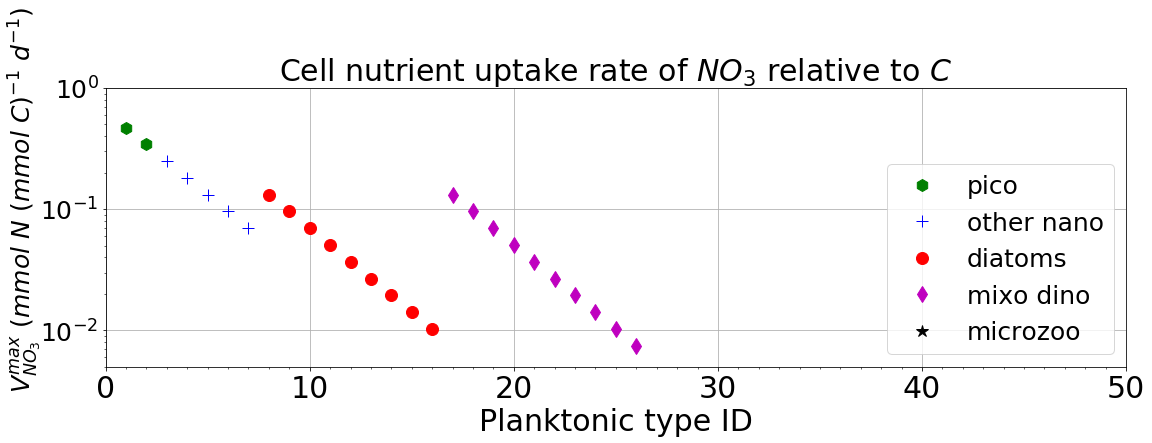

In [25]:
fig,ax=plt.subplots(figsize=(16, 6))
h3=ax.plot(type_id[pos_smalleuk]-2,  V_max_d[pos_smalleuk],'gh',markersize=12)
h4=ax.plot(type_id[pos_cocco]-2,     V_max_d[pos_cocco],   'b+')
h7=ax.plot(type_id[pos_diatoms]-2-5, V_max_d[pos_diatoms], 'ro')
h8=ax.plot(type_id[pos_mixodino]-2-5,V_max_d[pos_mixodino],'md')
h9=ax.plot(type_id[pos_zoo]-2-5,     V_max_d[pos_zoo],     'k*')

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator( 1))
ax.set_yscale('log')
ax.grid()
ax.set_xlim([0,50])
ax.set_ylim([0.005,1])
ax.set_title('Cell nutrient uptake rate of $NO_3$ relative to $C$')
ax.set_xlabel('Planktonic type ID')
ax.set_ylabel('$V^{max}_{NO_3}\ (mmol\ N\ (mmol\ C)^{-1}\ d^{-1})$')
ax.yaxis.set_label_coords(-0.06,0.6)
ax.yaxis.label.set_size(SMALL_SIZE)
ax.legend([h3[0],h4[0],h7[0],h8[0],h9[0]],
            ['pico',
            'other nano',
            'diatoms',
            'mixo dino',
            'microzoo'
            ],
          loc=4,
          fontsize=25)

plt.tight_layout()
figfile=os.path.join(indir,'gud_traits.V_max_d.png')
plt.savefig(figfile)

In [26]:
# fig,ax=plt.subplots(figsize=(16, 6))
# h1=ax.plot(type_id[pos_Prochlorococcus],ksatno3_mbg[pos_Prochlorococcus],'gs', markersize=12)
# h2=ax.plot(type_id[pos_Synechococcus],  ksatno3_mbg[pos_Synechococcus],  'gp')
# h3=ax.plot(type_id[pos_smalleuk],       ksatno3_mbg[pos_smalleuk],       'gh')
# h4=ax.plot(type_id[pos_cocco],          ksatno3_mbg[pos_cocco],          'b+')
# h5=ax.plot(type_id[pos_diazo],          ksatno3_mbg[pos_diazo],          'cx')
# h6=ax.plot(type_id[pos_Trichodesmium],  ksatno3_mbg[pos_Trichodesmium],  'cX')
# h7=ax.plot(type_id[pos_diatoms],        ksatno3_mbg[pos_diatoms],        'ro')
# h8=ax.plot(type_id[pos_mixodino],       ksatno3_mbg[pos_mixodino],       'md')
# # h9=ax.plot(type_id[pos_zoo],            ksatno3_mbg[pos_zoo],            'k*')

# ax.set_yscale('log')
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_minor_locator(MultipleLocator( 1))
# ax.grid()
# ax.set_xlim([0,70])
# ax.set_ylim([3e-3,5])
# ax.set_title('Half saturation for growth on $NO_3$\ncomputed by Maxime')
# ax.set_xlabel('Planktonic type ID')
# ax.set_ylabel('$k\ (mmol\ N\ m^{-3})$')
# ax.legend([h1[0],h2[0],h3[0],h4[0],h5[0],h6[0],h7[0],h8[0],h9[0]],
#            ['$Procholorococcus$',
#             '$Synechococcus$',
#             'small eukaryotes',
#             'other eukaryotes',
#             'diazotrophs',
#             '$Trichodesmium$',
#             'diatoms',
#             'mixo dino',
#             'microzooplankton'
#            ],
#           loc=4,
#           fontsize='xx-large'
#          )

# plt.tight_layout()
# figfile=os.path.join(indir,'gud_traits.ksatno3.mbg.prok.png')
# plt.savefig(figfile)

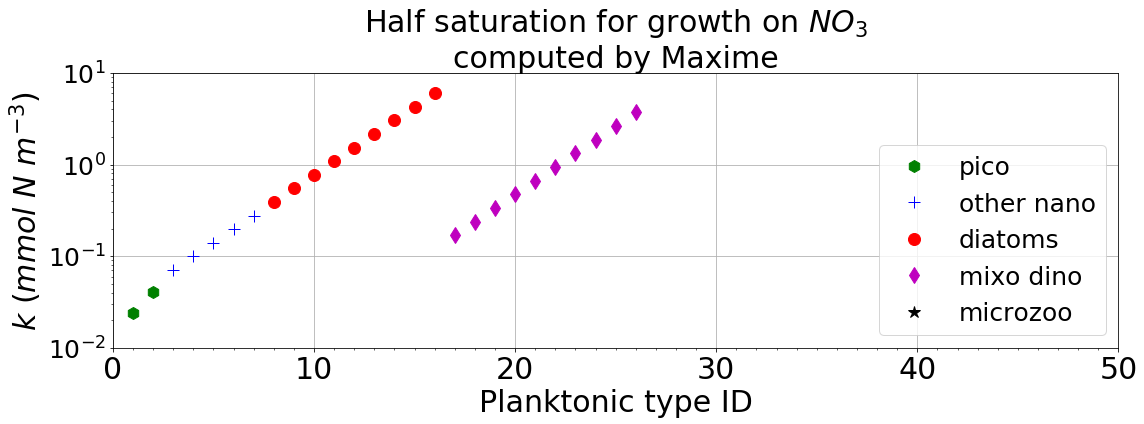

In [27]:
fig,ax=plt.subplots(figsize=(16, 6))
h3=ax.plot(type_id[pos_smalleuk]-2,  ksatno3_mbg[pos_smalleuk],'gh',markersize=12)
h4=ax.plot(type_id[pos_cocco]-2,     ksatno3_mbg[pos_cocco],   'b+')
h7=ax.plot(type_id[pos_diatoms]-2-5, ksatno3_mbg[pos_diatoms], 'ro')
h8=ax.plot(type_id[pos_mixodino]-2-5,ksatno3_mbg[pos_mixodino],'md')
# h9=ax.plot(type_id[pos_zoo]-2-5,     ksatno3_mbg[pos_zoo],     'k*')

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator( 1))
ax.set_yscale('log')
ax.grid()
ax.set_xlim([0,50])
ax.set_ylim([1e-2,10])
ax.set_title('Half saturation for growth on $NO_3$\ncomputed by Maxime')
ax.set_xlabel('Planktonic type ID')
ax.set_ylabel('$k\ (mmol\ N\ m^{-3})$')
ax.legend([h3[0],h4[0],h7[0],h8[0],h9[0]],
            ['pico',
            'other nano',
            'diatoms',
            'mixo dino',
            'microzoo'
            ],
          loc=4,
          fontsize=25)

plt.tight_layout()
figfile=os.path.join(indir,'gud_traits.ksatno3.mbg.png')
plt.savefig(figfile)

In [28]:
# fig,ax=plt.subplots(figsize=(16, 6))
# h1=ax.plot(type_id[pos_Prochlorococcus],ksatno3_runinfo[pos_Prochlorococcus],'gs', markersize=12)
# h2=ax.plot(type_id[pos_Synechococcus],  ksatno3_runinfo[pos_Synechococcus],  'gp')
# h3=ax.plot(type_id[pos_smalleuk],       ksatno3_runinfo[pos_smalleuk],       'gh')
# h4=ax.plot(type_id[pos_cocco],          ksatno3_runinfo[pos_cocco],          'b+')
# h5=ax.plot(type_id[pos_diazo],          ksatno3_runinfo[pos_diazo],          'cx')
# h6=ax.plot(type_id[pos_Trichodesmium],  ksatno3_runinfo[pos_Trichodesmium],  'cX')
# h7=ax.plot(type_id[pos_diatoms],        ksatno3_runinfo[pos_diatoms],        'ro')
# h8=ax.plot(type_id[pos_mixodino],       ksatno3_runinfo[pos_mixodino],       'md')
# # h9=ax.plot(type_id[pos_zoo],            ksatno3_runinfo[pos_zoo],            'k*')

# ax.set_yscale('log')
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_minor_locator(MultipleLocator( 1))
# ax.grid()
# ax.set_xlim([0,70])
# ax.set_ylim([3e-3,5])
# ax.set_title('Half saturation for growth on $NO_3$\n')
# ax.set_xlabel('Planktonic type ID')
# ax.set_ylabel('$k\ (mmol\ N\ m^{-3})$')
# ax.legend([h1[0],h2[0],h3[0],h4[0],h5[0],h6[0],h7[0],h8[0],h9[0]],
#            ['$Procholorococcus$',
#             '$Synechococcus$',
#             'small eukaryotes',
#             'other eukaryotes',
#             'diazotrophs',
#             '$Trichodesmium$',
#             'diatoms',
#             'mixo dino',
#             'microzooplankton'
#            ],
#           loc=4,
#           fontsize='xx-large'
#          )

# plt.tight_layout()
# figfile=os.path.join(indir,'gud_traits.ksatno3_runinfo.prok.png')
# plt.savefig(figfile)

The half saturation for growth on $NO_3$ computed by Maxime is the same as the one from RunInfo.

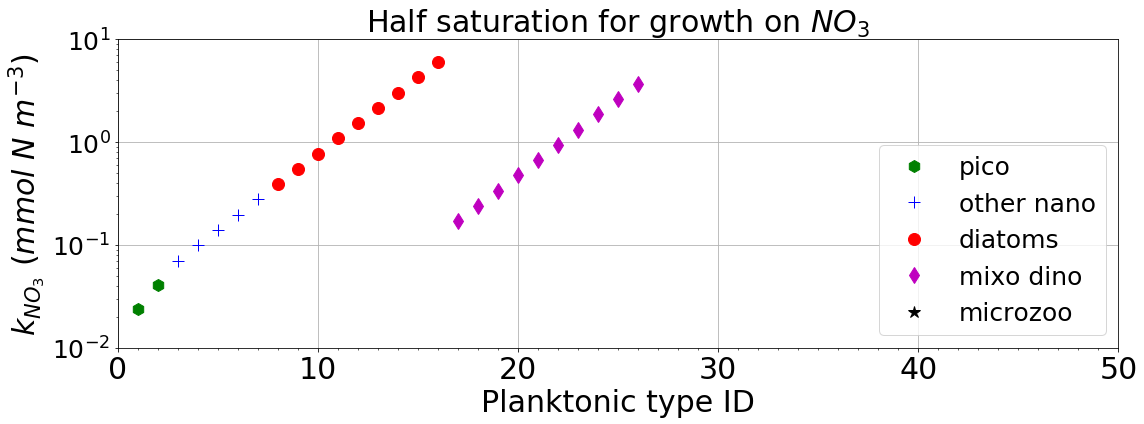

In [29]:
fig,ax=plt.subplots(figsize=(16, 6))
h3=ax.plot(type_id[pos_smalleuk]-2,  ksatno3_runinfo[pos_smalleuk],'gh',markersize=12)
h4=ax.plot(type_id[pos_cocco]-2,     ksatno3_runinfo[pos_cocco],   'b+')
h7=ax.plot(type_id[pos_diatoms]-2-5, ksatno3_runinfo[pos_diatoms], 'ro')
h8=ax.plot(type_id[pos_mixodino]-2-5,ksatno3_runinfo[pos_mixodino],'md')
# h9=ax.plot(type_id[pos_zoo]-2-5,     ksatno3_runinfo[pos_zoo],     'k*')

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator( 1))
ax.set_yscale('log')
ax.grid()
ax.set_xlim([0,50])
ax.set_ylim([1e-2,10])
ax.set_title('Half saturation for growth on $NO_3$')
ax.set_xlabel('Planktonic type ID')
ax.set_ylabel('$k_{NO_3}\ (mmol\ N\ m^{-3})$')
ax.legend([h3[0],h4[0],h7[0],h8[0],h9[0]],
            ['pico',
            'other nano',
            'diatoms',
            'mixo dino',
            'microzoo'
            ],
          loc=4,
          fontsize=25)

plt.tight_layout()
figfile=os.path.join(indir,'gud_traits.ksatno3_runinfo.png')
plt.savefig(figfile)

In [30]:
# fig,ax=plt.subplots(figsize=(16, 6))
# h1=ax.plot(type_id[pos_Prochlorococcus],affinityno3[pos_Prochlorococcus],'gs', markersize=12)
# h2=ax.plot(type_id[pos_Synechococcus],  affinityno3[pos_Synechococcus],  'gp')
# h3=ax.plot(type_id[pos_smalleuk],       affinityno3[pos_smalleuk],       'gh')
# h4=ax.plot(type_id[pos_cocco],          affinityno3[pos_cocco],          'b+')
# h5=ax.plot(type_id[pos_diazo],          affinityno3[pos_diazo],          'cx')
# h6=ax.plot(type_id[pos_Trichodesmium],  affinityno3[pos_Trichodesmium],  'cX')
# h7=ax.plot(type_id[pos_diatoms],        affinityno3[pos_diatoms],        'ro')
# h8=ax.plot(type_id[pos_mixodino],       affinityno3[pos_mixodino],       'md')
# # h9=ax.plot(type_id[pos_zoo],            affinityno3[pos_zoo],            'k*')

# ax.set_yscale('log')
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_minor_locator(MultipleLocator( 1))
# ax.grid()
# ax.set_xlim([0,70])
# ax.set_title('Affinity on $NO_3$ from $k_{NO_3}$')
# ax.set_xlabel('Planktonic type ID')
# ax.set_ylabel('$affinity_{NO_3}\ ((mmol\ N/m^3)^{-1}\ d^{-1})$')
# ax.yaxis.set_label_coords(-0.06,0.6)
# ax.yaxis.label.set_size(SMALL_SIZE)
# ax.legend([h1[0],h2[0],h3[0],h4[0],h5[0],h6[0],h7[0],h8[0],h9[0]],
#            ['$Procholorococcus$',
#             '$Synechococcus$',
#             'small eukaryotes',
#             'other eukaryotes',
#             'diazotrophs',
#             '$Trichodesmium$',
#             'diatoms',
#             'mixo dino',
#             'microzooplankton'
#            ],
#           loc=4,
#           fontsize='xx-large'
#          )

# plt.tight_layout()
# figfile=os.path.join(indir,'gud_traits.affinity.prok.png')
# plt.savefig(figfile)

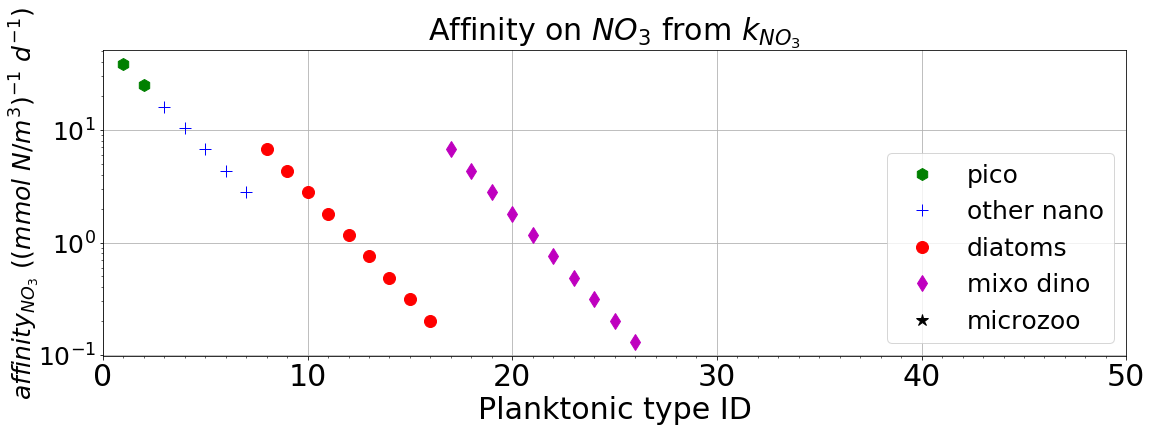

In [31]:
fig,ax=plt.subplots(figsize=(16, 6))
h3=ax.plot(type_id[pos_smalleuk]-2,  affinityno3[pos_smalleuk],'gh',markersize=12)
h4=ax.plot(type_id[pos_cocco]-2,     affinityno3[pos_cocco],   'b+')
h7=ax.plot(type_id[pos_diatoms]-2-5, affinityno3[pos_diatoms], 'ro')
h8=ax.plot(type_id[pos_mixodino]-2-5,affinityno3[pos_mixodino],'md')
# h9=ax.plot(type_id[pos_zoo]-2-5,     affinityno3[pos_zoo],     'k*')

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator( 1))
ax.set_yscale('log')
ax.grid()
ax.set_xlim([0,50])
# ax.set_ylim([1e-2,10])
ax.set_title('Affinity on $NO_3$ from $k_{NO_3}$')
ax.set_xlabel('Planktonic type ID')
ax.set_ylabel('$affinity_{NO_3}\ ((mmol\ N/m^3)^{-1}\ d^{-1})$')
ax.yaxis.set_label_coords(-0.06,0.5)
ax.yaxis.label.set_size(SMALL_SIZE)
ax.legend([h3[0],h4[0],h7[0],h8[0],h9[0]],
            ['pico',
            'other nano',
            'diatoms',
            'mixo dino',
            'microzoo'
            ],
          loc=4,
          fontsize=25)

plt.tight_layout()
figfile=os.path.join(indir,'gud_traits.affinity.png')
plt.savefig(figfile)

# Grazing parameters

## Maximum grazing rate ($g_{max}$, $d^{-1}$)

In [32]:
stod=86400
gmax=info.f['grazemax'] # s^-1
gmax=gmax*stod # d^-1

# Grazing half saturation rate ($k_p$, $mmol\ C\ m^{-3}$)

In [33]:
kgrazesat=info.f['kgrazesat']

## plots

## Maximum grazing rate ($g_{max}$, $d^{-1}$)

In [34]:
# fig,ax=plt.subplots(figsize=(16, 6))
# h1=ax.plot(type_id[pos_Prochlorococcus],gmax[pos_Prochlorococcus],'gs', markersize=12)
# h2=ax.plot(type_id[pos_Synechococcus],  gmax[pos_Synechococcus],  'gp')
# h3=ax.plot(type_id[pos_smalleuk],       gmax[pos_smalleuk],       'gh')
# h4=ax.plot(type_id[pos_cocco],          gmax[pos_cocco],          'b+')
# h5=ax.plot(type_id[pos_diazo],          gmax[pos_diazo],          'cx')
# h6=ax.plot(type_id[pos_Trichodesmium],  gmax[pos_Trichodesmium],  'cX')
# h7=ax.plot(type_id[pos_diatoms],        gmax[pos_diatoms],        'ro')
# h8=ax.plot(type_id[pos_mixodino],       gmax[pos_mixodino],       'md')
# h9=ax.plot(type_id[pos_zoo],            gmax[pos_zoo],            'k*')

# ax.set_yscale('log')
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_minor_locator(MultipleLocator( 1))
# ax.grid()
# ax.set_xlim([0,70])
# ax.set_ylim([0.5,50])
# ax.set_title('Maximum grazing rate')
# ax.set_xlabel('Planktonic type ID')
# ax.set_ylabel('$g_{max}\ (d^{-1})$')
# ax.yaxis.set_label_coords(-0.06,0.6)
# ax.yaxis.label.set_size(SMALL_SIZE)
# ax.legend([h1[0],h2[0],h3[0],h4[0],h5[0],h6[0],h7[0],h8[0],h9[0]],
#            ['$Procholorococcus$',
#             '$Synechococcus$',
#             'small eukaryotes',
#             'other eukaryotes',
#             'diazotrophs',
#             '$Trichodesmium$',
#             'diatoms',
#             'mixo dino',
#             'microzooplankton'
#            ],
#           loc=4,
#           fontsize='xx-large'
#          )

# plt.tight_layout()
# figfile=os.path.join(indir,'gud_traits.gmax.prok.png')
# plt.savefig(figfile)

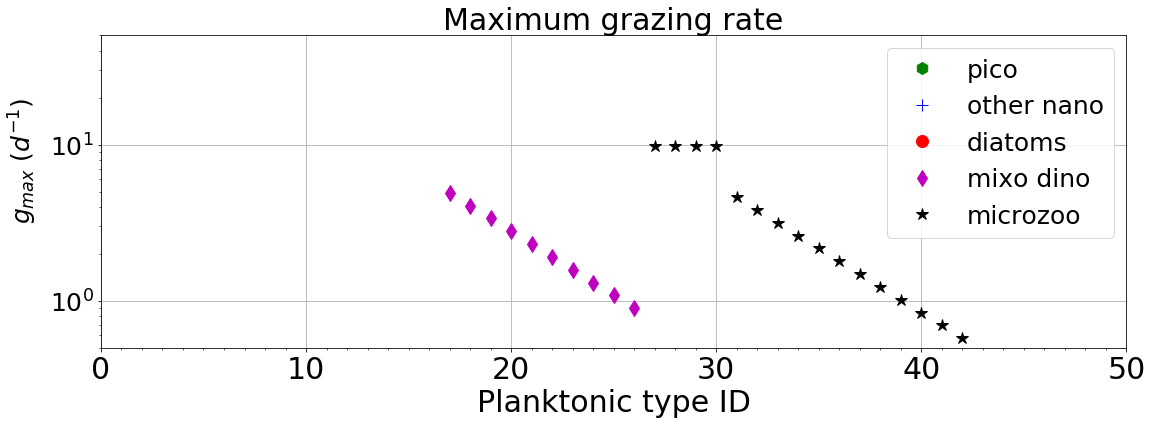

In [35]:
fig,ax=plt.subplots(figsize=(16, 6))
# h3=ax.plot(type_id[pos_smalleuk]-2,  gmax[pos_smalleuk],'gh',markersize=12)
# h4=ax.plot(type_id[pos_cocco]-2,     gmax[pos_cocco],   'b+')
# h7=ax.plot(type_id[pos_diatoms]-2-5, gmax[pos_diatoms], 'ro')
h8=ax.plot(type_id[pos_mixodino]-2-5,gmax[pos_mixodino],'md')
h9=ax.plot(type_id[pos_zoo]-2-5,     gmax[pos_zoo],     'k*')

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator( 1))
ax.set_yscale('log')
ax.grid()
ax.set_xlim([0,50])
ax.set_ylim([0.5,50])
ax.set_title('Maximum grazing rate')
ax.set_xlabel('Planktonic type ID')
ax.set_ylabel('$g_{max}\ (d^{-1})$')
ax.yaxis.set_label_coords(-0.06,0.6)
ax.yaxis.label.set_size(SMALL_SIZE)
ax.legend([h3[0],h4[0],h7[0],h8[0],h9[0]],
            ['pico',
            'other nano',
            'diatoms',
            'mixo dino',
            'microzoo'
            ],
#           loc=4,
          fontsize=25)

plt.tight_layout()
figfile=os.path.join(indir,'gud_traits.gmax.png')
plt.savefig(figfile)

# Grazing half saturation rate ($k_p$, $mmol\ C\ m^{-3}$)

In [36]:
# fig,ax=plt.subplots(figsize=(16, 6))
# # h1=ax.plot(type_id[pos_Prochlorococcus],kgrazesat[pos_Prochlorococcus],'gs', markersize=12)
# # h2=ax.plot(type_id[pos_Synechococcus],  kgrazesat[pos_Synechococcus],  'gp')
# # h3=ax.plot(type_id[pos_smalleuk],       kgrazesat[pos_smalleuk],       'gh')
# # h4=ax.plot(type_id[pos_cocco],          kgrazesat[pos_cocco],          'b+')
# # h5=ax.plot(type_id[pos_diazo],          kgrazesat[pos_diazo],          'cx')
# # h6=ax.plot(type_id[pos_Trichodesmium],  kgrazesat[pos_Trichodesmium],  'cX')
# # h7=ax.plot(type_id[pos_diatoms],        kgrazesat[pos_diatoms],        'ro')
# h8=ax.plot(type_id[pos_mixodino],       kgrazesat[pos_mixodino],       'md')
# h9=ax.plot(type_id[pos_zoo],            kgrazesat[pos_zoo],            'k*')

# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_minor_locator(MultipleLocator( 1))
# ax.grid()
# ax.set_xlim([0,70])
# ax.set_ylim([0,3])
# ax.set_title('Grazing half saturation rate')
# ax.set_xlabel('Planktonic type ID')
# ax.set_ylabel('$k_p\ (mmol\ C\ m^{-3})$')
# ax.yaxis.set_label_coords(-0.06,0.6)
# ax.yaxis.label.set_size(SMALL_SIZE)
# ax.legend([h1[0],h2[0],h3[0],h4[0],h5[0],h6[0],h7[0],h8[0],h9[0]],
#            ['$Procholorococcus$',
#             '$Synechococcus$',
#             'small eukaryotes',
#             'other eukaryotes',
#             'diazotrophs',
#             '$Trichodesmium$',
#             'diatoms',
#             'mixo dino',
#             'microzooplankton'
#            ],
#           loc=4,
#           fontsize='xx-large'
#          )

# plt.tight_layout()
# figfile=os.path.join(indir,'gud_traits.kgrazesat.prok.png')
# plt.savefig(figfile)

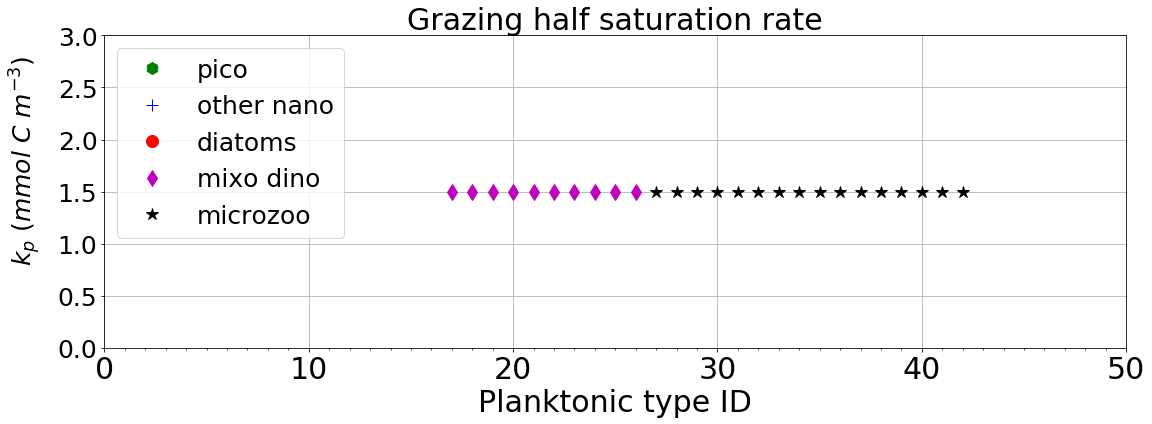

In [37]:
fig,ax=plt.subplots(figsize=(16, 6))
# h3=ax.plot(type_id[pos_smalleuk]-2,  kgrazesat[pos_smalleuk],'gh',markersize=12)
# h4=ax.plot(type_id[pos_cocco]-2,     kgrazesat[pos_cocco],   'b+')
# h7=ax.plot(type_id[pos_diatoms]-2-5, kgrazesat[pos_diatoms], 'ro')
h8=ax.plot(type_id[pos_mixodino]-2-5,kgrazesat[pos_mixodino],'md')
h9=ax.plot(type_id[pos_zoo]-2-5,     kgrazesat[pos_zoo],     'k*')

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator( 1))
ax.grid()
ax.set_xlim([0,50])
ax.set_ylim([0,3])
ax.set_title('Grazing half saturation rate')
ax.set_xlabel('Planktonic type ID')
ax.set_ylabel('$k_p\ (mmol\ C\ m^{-3})$')
ax.yaxis.set_label_coords(-0.06,0.6)
ax.yaxis.label.set_size(SMALL_SIZE)
ax.legend([h3[0],h4[0],h7[0],h8[0],h9[0]],
            ['pico',
            'other nano',
            'diatoms',
            'mixo dino',
            'microzoo'
            ],
#           loc=4,
          fontsize=25)

plt.tight_layout()
figfile=os.path.join(indir,'gud_traits.kgrazesat.png')
plt.savefig(figfile)